# Detection of Lead-Lag relationships

In [309]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Agriculture Index

In [310]:
df = pd.read_csv("AGRICULTURE.csv", index_col='DATE', parse_dates=True)

In [311]:
df.head()

,SPOT,FUTURE
DATE,,
2009-12-10,270.1053,126.8045
2009-12-11,273.7968,128.4607
2009-12-14,279.7481,131.1803
2009-12-15,278.2661,130.4855
2009-12-16,282.3329,132.3927


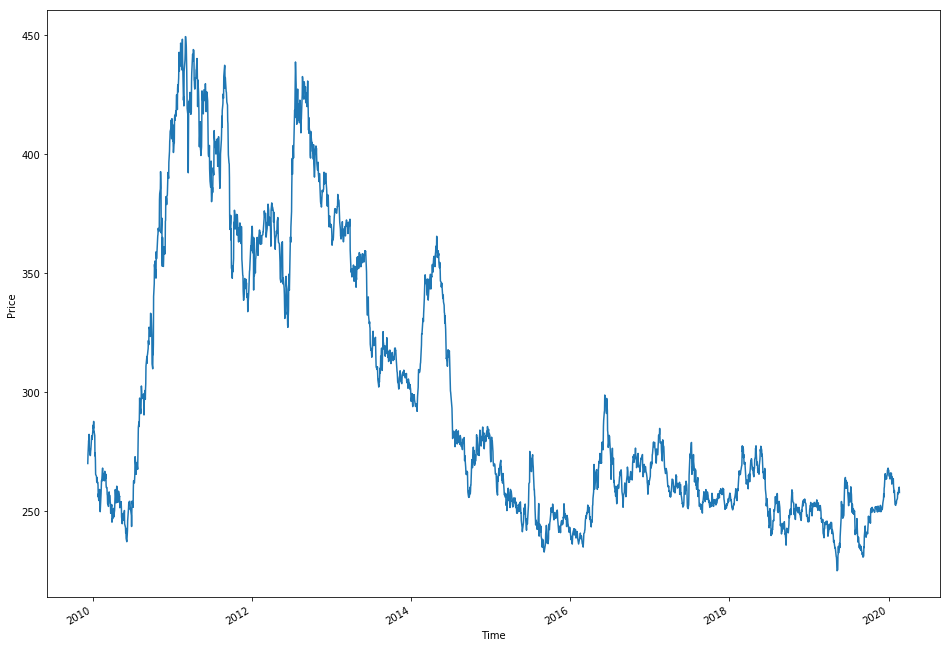

In [312]:
df['SPOT'].plot(figsize=(16,12))
plt.xlabel('Time')
plt.ylabel('Price');

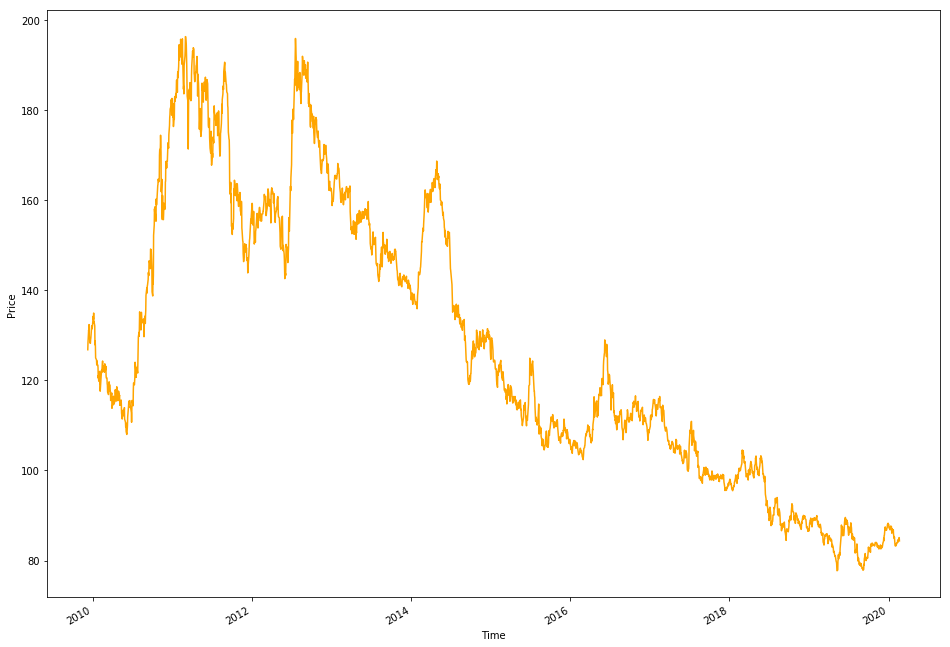

In [313]:
df['FUTURE'].plot(figsize=(16,12), c='orange')
plt.xlabel('Time')
plt.ylabel('Price');

Text(0,0.5,'Price')

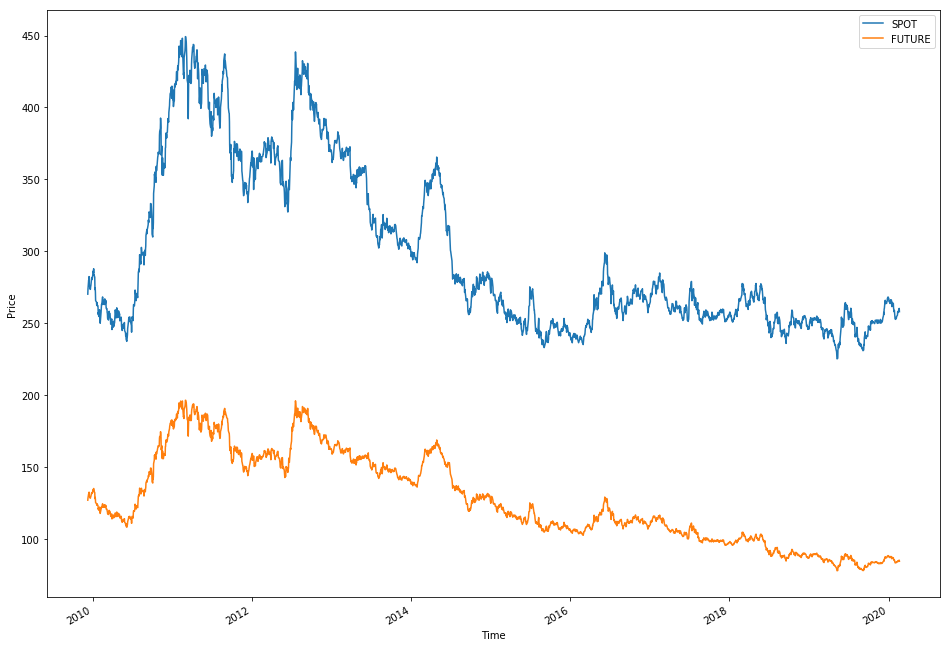

In [314]:
df.plot(figsize=(16,12))
plt.xlabel('Time')
plt.ylabel('Price')

#### STATIONARITY TEST

In [315]:
from statsmodels.tsa.stattools import adfuller

In [316]:
#ON SPOT PRICE
adfuller(df['SPOT'])

(-1.5108152003856385,
 0.5281545911336507,
 1,
 2567,
 {'1%': -3.432900000469521,
  '5%': -2.8626665895880508,
  '10%': -2.567369725077316},
 13557.035863748632)

In [317]:
df['SPOT Difference']=df['SPOT']-df['SPOT'].shift(1)
adfuller(df['SPOT Difference'].dropna())

(-49.105108554868515,
 0.0,
 0,
 2567,
 {'1%': -3.432900000469521,
  '5%': -2.8626665895880508,
  '10%': -2.567369725077316},
 13553.042843639545)

In [318]:
#ON FUTURE PRICE
adfuller(df['FUTURE'])

(-0.9362975103280478,
 0.7757842976422112,
 5,
 2563,
 {'1%': -3.4329039841780644,
  '5%': -2.8626683488356117,
  '10%': -2.5673706617172343},
 9219.330858001931)

In [319]:
df['FUTURE Difference']=df['FUTURE']-df['FUTURE'].shift(1)
adfuller(df['FUTURE Difference'].dropna())

(-21.506530804569486,
 0.0,
 4,
 2563,
 {'1%': -3.4329039841780644,
  '5%': -2.8626683488356117,
  '10%': -2.5673706617172343},
 9215.508134106149)

In [320]:
df.head()

,SPOT,FUTURE,SPOT Difference,FUTURE Difference
DATE,,,,
2009-12-10,270.1053,126.8045,NaN,NaN
2009-12-11,273.7968,128.4607,3.6915,1.6562
2009-12-14,279.7481,131.1803,5.9513,2.7196
2009-12-15,278.2661,130.4855,-1.4820,-0.6948
2009-12-16,282.3329,132.3927,4.0668,1.9072


The Augmented Dickey-Fuller(ADF) unit root test shows that the order of integration of both the time series is 1

#### Selection of Lag Order

In [321]:
from statsmodels.tsa.vector_ar.vecm import select_order

In [322]:
lags = select_order(df.iloc[:,0:2],maxlags=4,deterministic='co')

C:\Users\Divyam Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Divyam Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Divyam Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Divyam Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequen

In [323]:
lag.ics

defaultdict(list,
            {'aic': [0.21481885765020273,
              0.1700199596430323,
              0.16402455232867902,
              0.14868554216991547,
              0.14640060953972608],
             'bic': [0.23306947798730276,
              0.19739589014868233,
              0.2005257930028791,
              0.19431209301266558,
              0.2011524705510262],
             'hqic': [0.22143618925865835,
              0.1799459570557157,
              0.17725921554559027,
              0.16522887119105453,
              0.16625260436509295],
             'fpe': [1.2396373320845766,
              1.1853285300706864,
              1.178243291072056,
              1.1603081556622221,
              1.1576600229930996]})

In [324]:
lag.selected_orders

{'aic': 4, 'bic': 3, 'hqic': 3, 'fpe': 4}

In [325]:
lag.vecm

True

As per the above information criteria, it shows that the model is a VECM model with optimal lag length of 4

#### COINTEGRATION TESTS

In [326]:
#Checking for cointegration between the two variables
from statsmodels.tsa.vector_ar.vecm import coint_johansen
'''https://towardsdatascience.com/vector-autoregressions-vector-error-correction-multivariate-model-a69daf6ab618'''

'https://towardsdatascience.com/vector-autoregressions-vector-error-correction-multivariate-model-a69daf6ab618'

In [327]:
'''#Checking for cointegration using ADFuller 
from statsmodels.regression.linear_model import OLS
#import statsmodels.tools as sm
#x = sm.add_constant(df['FUTURE'])
res = OLS(df['SPOT'],df['FUTURE']).fit()
res.summary()'''

"#Checking for cointegration using ADFuller \nfrom statsmodels.regression.linear_model import OLS\n#import statsmodels.tools as sm\n#x = sm.add_constant(df['FUTURE'])\nres = OLS(df['SPOT'],df['FUTURE']).fit()\nres.summary()"

In [328]:
'''adfuller(res.resid)'''

'adfuller(res.resid)'

In [329]:
'''res.resid.plot()'''

'res.resid.plot()'

In [330]:
result = coint_johansen(endog = df.iloc[:,0:2], det_order = 0 , k_ar_diff=4)

'''
Read output of coint_johansen:
https://kite.com/python/docs/statsmodels.tsa.vector_ar.vecm.coint_johansen
'''

In [331]:
result.lr1 # Trace statistic

array([6.38714619, 0.00917241])

In [332]:
result.cvt #Shows critical values for trace statistics

array([[13.4294, 15.4943, 19.9349],
       [ 2.7055,  3.8415,  6.6349]])

In [333]:
result.lr2 #Eigen value statistic

array([6.37797378, 0.00917241])

In [334]:
result.cvm #Critical Values for Eigen value statistic

array([[12.2971, 14.2639, 18.52  ],
       [ 2.7055,  3.8415,  6.6349]])

In [335]:
result.evec

array([[ 0.02892297, -0.04578122],
       [-0.02391151,  0.09764633]])

As per the above Johansen's cointegration test it shows that the variables are not cointegrated

#### VECM Model

In [336]:
#VECM Model
from statsmodels.tsa.vector_ar.vecm import VECM

In [337]:
model = VECM(endog=df.iloc[:,0:2],k_ar_diff = 4, coint_rank=1, deterministic='co').fit()

C:\Users\Divyam Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [338]:
model.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
const,0.5960,0.390,1.529,0.126,-0.168,1.360
L1.SPOT,-0.3263,0.095,-3.440,0.001,-0.512,-0.140
L1.FUTURE,0.8693,0.222,3.922,0.000,0.435,1.304
L2.SPOT,0.2291,0.096,2.388,0.017,0.041,0.417
L2.FUTURE,-0.5749,0.224,-2.565,0.010,-1.014,-0.136
L3.SPOT,0.1777,0.096,1.852,0.064,-0.010,0.366
L3.FUTURE,-0.3562,0.224,-1.590,0.112,-0.795,0.083
L4.SPOT,-0.1077,0.095,-1.135,0.256,-0.294,0.078
L4.FUTURE,0.2126,0.222,0.959,0.337,-0.222,0.647
,coef,std err,z,P>|z|,[0.025,0.975]


#### CONCLUSION

Coefficient of lagged values of FUTURE in the regression of SPOT: significant at 5% level
<br>Coefficient of lagged values of SPOT in the regression of FUTURE: not significant at 5% level
<br>Coefficient of loading coeffcient in the regression of SPOT: not significant at 5% level
<br>Coefficient of loading coeffcient in the regression of FUTURE: not significant at 5% level
    
Hence, based on the above results we can say there is a short-run unidirectional causality running from FUTURE to SPOT
and there is no long term causality running between the two variables.

# Live Stock Index

In [339]:
df = pd.read_csv("LIVE STOCK.csv", index_col='DATE', parse_dates=True)

In [340]:
df.head()

,SPOT,FUTURE
DATE,,
2009-12-10,127.3650,66.9102
2009-12-11,128.4296,67.4695
2009-12-14,129.4118,67.9858
2009-12-15,131.4888,69.0770
2009-12-16,131.0259,68.8339


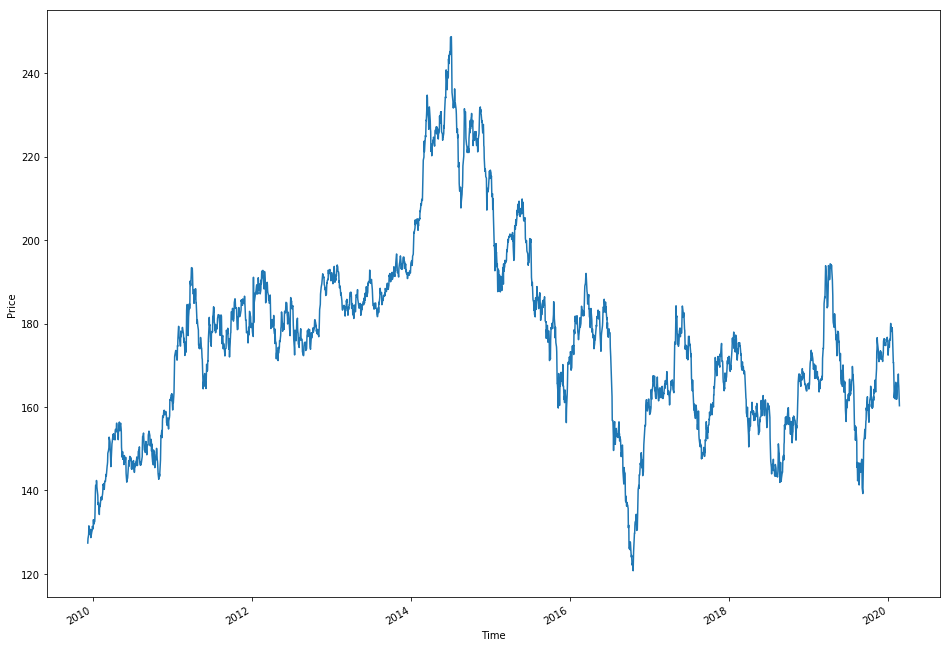

In [341]:
df['SPOT'].plot(figsize=(16,12))
plt.xlabel('Time')
plt.ylabel('Price');

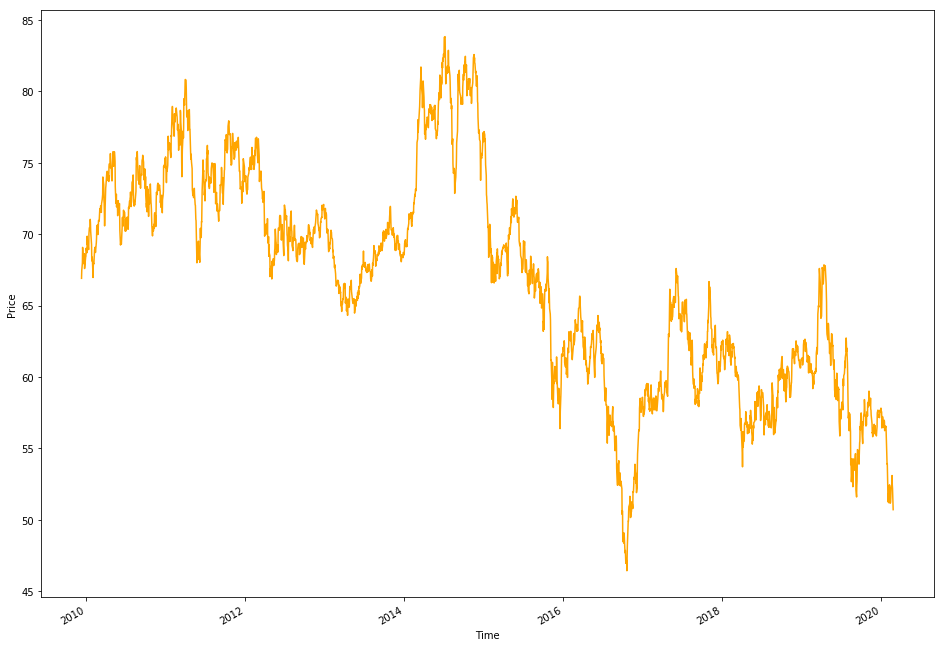

In [342]:
df['FUTURE'].plot(figsize=(16,12),color = 'orange')
plt.xlabel('Time')
plt.ylabel('Price');

Text(0,0.5,'Price')

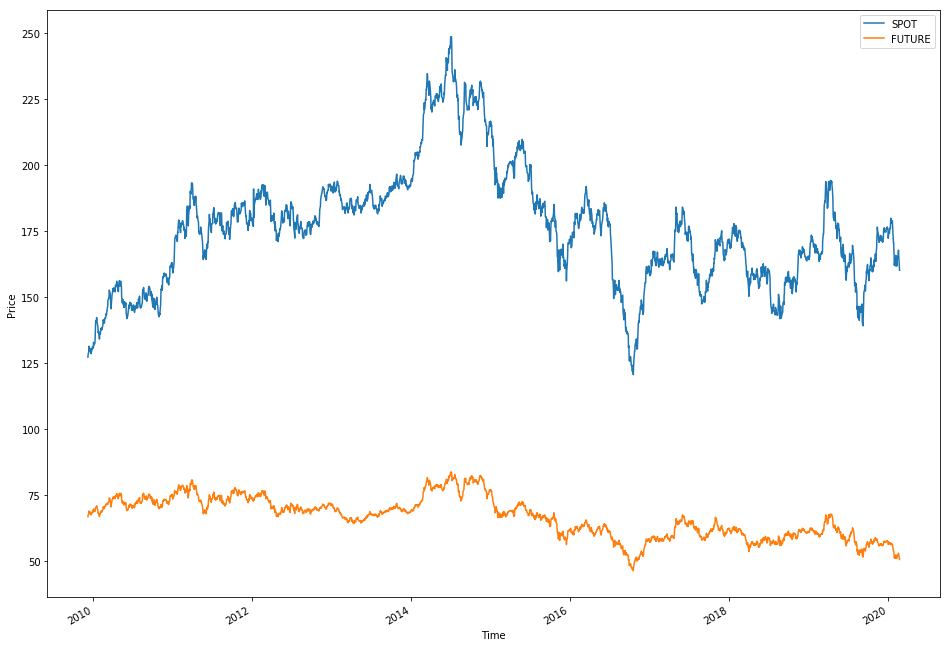

In [343]:
df.plot(figsize=(16,12))
plt.xlabel('Time')
plt.ylabel('Price')

#### STATIONARITY TEST

In [344]:
from statsmodels.tsa.stattools import adfuller

In [345]:
#ON SPOT PRICE
adfuller(df['SPOT'])

(-2.6009450561177263,
 0.09280210083008011,
 3,
 2568,
 {'1%': -3.4328990064834404,
  '5%': -2.8626661506329856,
  '10%': -2.5673694913735794},
 10053.544161022579)

In [346]:
df['SPOT Difference']=df['SPOT']-df['SPOT'].shift(1)
adfuller(df['SPOT Difference'].dropna())

(-26.784864768702366,
 0.0,
 2,
 2568,
 {'1%': -3.4328990064834404,
  '5%': -2.8626661506329856,
  '10%': -2.5673694913735794},
 10054.662471479684)

In [347]:
#ON FUTURE PRICE
adfuller(df['FUTURE'])

(-1.5502558007809173,
 0.5085204177870704,
 0,
 2571,
 {'1%': -3.432896029169223,
  '5%': -2.862664835817767,
  '10%': -2.5673687913539416},
 4802.425783417375)

In [348]:
df['FUTURE Difference']=df['FUTURE']-df['FUTURE'].shift(1)
adfuller(df['FUTURE Difference'].dropna())

(-49.77417134338738,
 0.0,
 0,
 2570,
 {'1%': -3.432897020834196,
  '5%': -2.8626652737482425,
  '10%': -2.5673690245121046},
 4802.955402459513)

In [349]:
df.head()

,SPOT,FUTURE,SPOT Difference,FUTURE Difference
DATE,,,,
2009-12-10,127.3650,66.9102,NaN,NaN
2009-12-11,128.4296,67.4695,1.0646,0.5593
2009-12-14,129.4118,67.9858,0.9822,0.5163
2009-12-15,131.4888,69.0770,2.0770,1.0912
2009-12-16,131.0259,68.8339,-0.4629,-0.2431


The Augmented Dickey-Fuller(ADF) unit root test shows that the order of integration of both the time series is 1

#### Selection of Lag Order

In [350]:
from statsmodels.tsa.vector_ar.vecm import select_order

In [351]:
lags = select_order(df.iloc[:,0:2],maxlags=4,deterministic='co')

C:\Users\Divyam Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Divyam Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Divyam Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Divyam Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequen

In [352]:
lag.ics

defaultdict(list,
            {'aic': [0.21481885765020273,
              0.1700199596430323,
              0.16402455232867902,
              0.14868554216991547,
              0.14640060953972608],
             'bic': [0.23306947798730276,
              0.19739589014868233,
              0.2005257930028791,
              0.19431209301266558,
              0.2011524705510262],
             'hqic': [0.22143618925865835,
              0.1799459570557157,
              0.17725921554559027,
              0.16522887119105453,
              0.16625260436509295],
             'fpe': [1.2396373320845766,
              1.1853285300706864,
              1.178243291072056,
              1.1603081556622221,
              1.1576600229930996]})

In [353]:
lag.selected_orders

{'aic': 4, 'bic': 3, 'hqic': 3, 'fpe': 4}

In [354]:
lag.vecm

True

As per the above information criteria, it shows that the model is a VECM model with optimal lag length of 4

#### COINTEGRATION TESTS

In [355]:
#Checking for cointegration between the two variables
from statsmodels.tsa.vector_ar.vecm import coint_johansen
'''https://towardsdatascience.com/vector-autoregressions-vector-error-correction-multivariate-model-a69daf6ab618'''

'https://towardsdatascience.com/vector-autoregressions-vector-error-correction-multivariate-model-a69daf6ab618'

In [356]:
'''#Checking for cointegration using ADFuller 
from statsmodels.regression.linear_model import OLS
#import statsmodels.tools as sm
#x = sm.add_constant(df['FUTURE'])
res = OLS(df['SPOT'],df['FUTURE']).fit()
res.summary()'''

"#Checking for cointegration using ADFuller \nfrom statsmodels.regression.linear_model import OLS\n#import statsmodels.tools as sm\n#x = sm.add_constant(df['FUTURE'])\nres = OLS(df['SPOT'],df['FUTURE']).fit()\nres.summary()"

In [357]:
'''adfuller(res.resid)'''

'adfuller(res.resid)'

In [358]:
'''res.resid.plot()'''

'res.resid.plot()'

In [359]:
result = coint_johansen(endog = df.iloc[:,0:2], det_order = 0 , k_ar_diff=4)

'''
Read output of coint_johansen:
https://kite.com/python/docs/statsmodels.tsa.vector_ar.vecm.coint_johansen
'''

In [360]:
result.lr1 # Trace statistic

array([10.59146604,  2.25174744])

In [361]:
result.cvt #Shows critical values for trace statistics

array([[13.4294, 15.4943, 19.9349],
       [ 2.7055,  3.8415,  6.6349]])

In [362]:
result.lr2 #Eigen value statistic

array([8.3397186 , 2.25174744])

In [363]:
result.cvm #Critical Values for Eigen value statistic

array([[12.2971, 14.2639, 18.52  ],
       [ 2.7055,  3.8415,  6.6349]])

In [364]:
result.evec

array([[ 0.05458684, -0.01792027],
       [-0.06153226,  0.16062588]])

As per the above Johansen's cointegration test it shows that the variables are not cointegrated

#### VECM Model

In [365]:
#VECM Model
from statsmodels.tsa.vector_ar.vecm import VECM

In [366]:
model = VECM(endog=df.iloc[:,0:2],k_ar_diff = 4, coint_rank=1, deterministic='co').fit()

C:\Users\Divyam Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [367]:
model.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
const,0.4418,0.191,2.311,0.021,0.067,0.817
L1.SPOT,0.1443,0.067,2.170,0.030,0.014,0.275
L1.FUTURE,-0.3351,0.186,-1.806,0.071,-0.699,0.029
L2.SPOT,0.2508,0.067,3.753,0.000,0.120,0.382
L2.FUTURE,-0.6573,0.186,-3.528,0.000,-1.023,-0.292
L3.SPOT,0.1137,0.067,1.702,0.089,-0.017,0.245
L3.FUTURE,-0.2214,0.186,-1.191,0.234,-0.586,0.143
L4.SPOT,0.0308,0.066,0.463,0.643,-0.100,0.161
L4.FUTURE,-0.0691,0.185,-0.373,0.709,-0.432,0.294
,coef,std err,z,P>|z|,[0.025,0.975]


#### CONCLUSION

Coefficient of lagged values of FUTURE in the regression of SPOT: significant at 5% level.
<br>Coefficient of lagged values of SPOT in the regression of FUTURE: not significant at 5% level
<br>Coefficient of loading coeffcient in the regression of SPOT: not significant at 5% level
<br>Coefficient of loading coeffcient in the regression of FUTURE: not significant at 5% level
    
Hence, based on the above results we can say there is a short-run unidirectional causality running from FUTURE to SPOT
and there is no long term causality running between the two variables.

# Precious Metals Index

In [368]:
df = pd.read_csv("PRECIOUS METALS.csv", index_col='DATE', parse_dates=True)

In [369]:
df.head()

,SPOT,FUTURE
DATE,,
2009-12-10,334.3950,330.8218
2009-12-11,332.5137,328.9610
2009-12-14,334.7776,331.2021
2009-12-15,335.2786,331.6981
2009-12-16,339.4102,335.7859


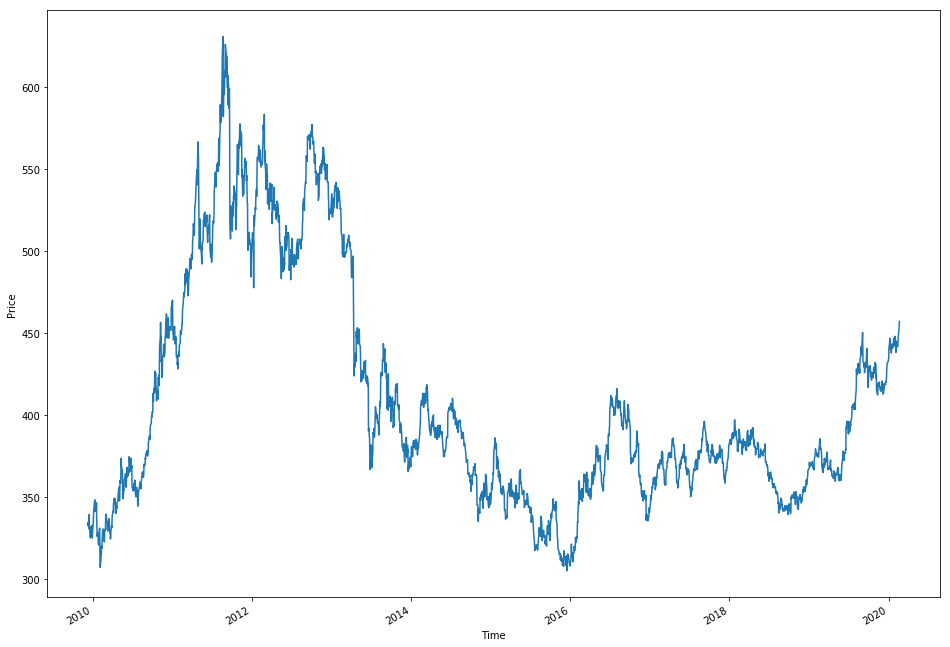

In [370]:
df['SPOT'].plot(figsize=(16,12))
plt.xlabel('Time')
plt.ylabel('Price');

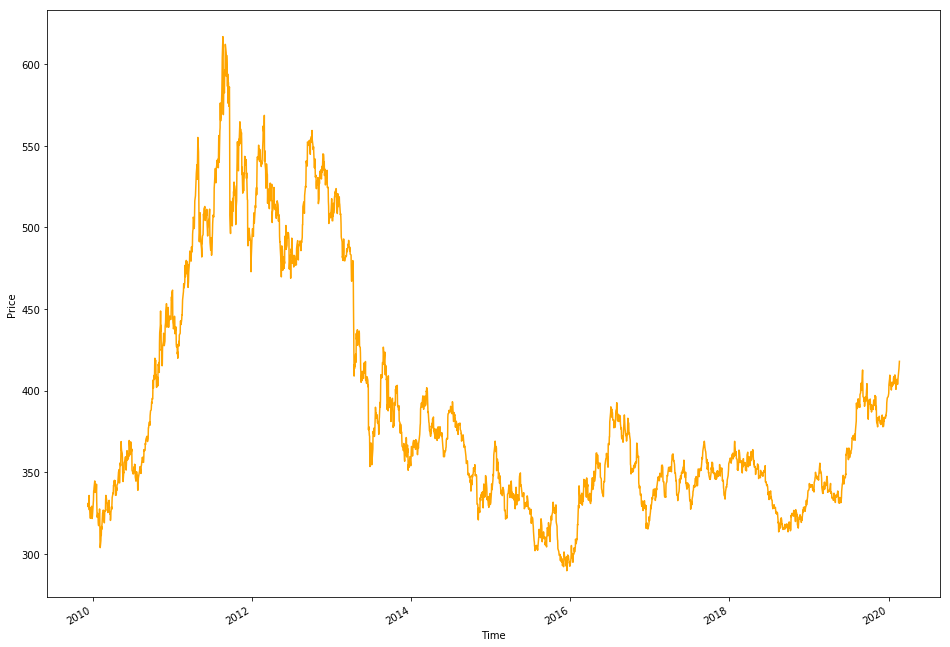

In [397]:
df['FUTURE'].plot(figsize=(16,12),color='orange')
plt.xlabel('Time')
plt.ylabel('Price');

Text(0,0.5,'Price')

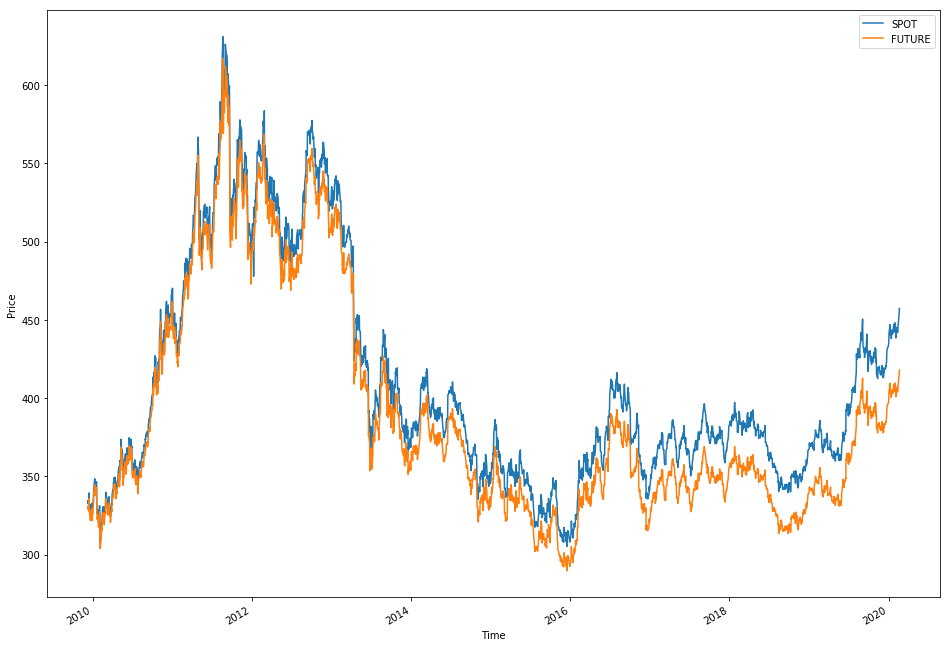

In [372]:
df.plot(figsize=(16,12))
plt.xlabel('Time')
plt.ylabel('Price')

#### STATIONARITY TEST

In [373]:
from statsmodels.tsa.stattools import adfuller

In [374]:
#ON SPOT PRICE
adfuller(df['SPOT'])

(-1.977330628130098,
 0.2966004183641978,
 9,
 2560,
 {'1%': -3.4329069801374077,
  '5%': -2.862669671881199,
  '10%': -2.5673713661193847},
 15523.10659408757)

In [375]:
df['SPOT Difference']=df['SPOT']-df['SPOT'].shift(1)
adfuller(df['SPOT Difference'].dropna())

(-15.978085359558444,
 6.884561565751759e-29,
 8,
 2560,
 {'1%': -3.4329069801374077,
  '5%': -2.862669671881199,
  '10%': -2.5673713661193847},
 15518.061816683363)

In [376]:
#ON FUTURE PRICE
adfuller(df['FUTURE'])

(-1.839941732983566,
 0.3608196718566172,
 9,
 2560,
 {'1%': -3.4329069801374077,
  '5%': -2.862669671881199,
  '10%': -2.5673713661193847},
 15253.427698165557)

In [377]:
df['FUTURE Difference']=df['FUTURE']-df['FUTURE'].shift(1)
adfuller(df['FUTURE Difference'].dropna())

(-16.035185188253703,
 5.996990709845228e-29,
 8,
 2560,
 {'1%': -3.4329069801374077,
  '5%': -2.862669671881199,
  '10%': -2.5673713661193847},
 15247.927160892903)

In [378]:
df.head()

,SPOT,FUTURE,SPOT Difference,FUTURE Difference
DATE,,,,
2009-12-10,334.3950,330.8218,NaN,NaN
2009-12-11,332.5137,328.9610,-1.8813,-1.8608
2009-12-14,334.7776,331.2021,2.2639,2.2411
2009-12-15,335.2786,331.6981,0.5010,0.4960
2009-12-16,339.4102,335.7859,4.1316,4.0878


The Augmented Dickey-Fuller(ADF) unit root test shows that the order of integration of both the time series is 1

#### Selection of Lag Order

In [379]:
from statsmodels.tsa.vector_ar.vecm import select_order

In [380]:
lags = select_order(df.iloc[:,0:2],maxlags=4,deterministic='co')

C:\Users\Divyam Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Divyam Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Divyam Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Divyam Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequen

In [381]:
lag.ics

defaultdict(list,
            {'aic': [0.21481885765020273,
              0.1700199596430323,
              0.16402455232867902,
              0.14868554216991547,
              0.14640060953972608],
             'bic': [0.23306947798730276,
              0.19739589014868233,
              0.2005257930028791,
              0.19431209301266558,
              0.2011524705510262],
             'hqic': [0.22143618925865835,
              0.1799459570557157,
              0.17725921554559027,
              0.16522887119105453,
              0.16625260436509295],
             'fpe': [1.2396373320845766,
              1.1853285300706864,
              1.178243291072056,
              1.1603081556622221,
              1.1576600229930996]})

In [382]:
lag.selected_orders

{'aic': 4, 'bic': 3, 'hqic': 3, 'fpe': 4}

In [383]:
lag.vecm

True

As per the above information criteria, it shows that the model is a VECM model with optimal lag length of 4

#### COINTEGRATION TESTS

In [384]:
#Checking for cointegration between the two variables
from statsmodels.tsa.vector_ar.vecm import coint_johansen
'''https://towardsdatascience.com/vector-autoregressions-vector-error-correction-multivariate-model-a69daf6ab618'''

'https://towardsdatascience.com/vector-autoregressions-vector-error-correction-multivariate-model-a69daf6ab618'

In [385]:
'''#Checking for cointegration using ADFuller 
from statsmodels.regression.linear_model import OLS
#import statsmodels.tools as sm
#x = sm.add_constant(df['FUTURE'])
res = OLS(df['SPOT'],df['FUTURE']).fit()
res.summary()'''

"#Checking for cointegration using ADFuller \nfrom statsmodels.regression.linear_model import OLS\n#import statsmodels.tools as sm\n#x = sm.add_constant(df['FUTURE'])\nres = OLS(df['SPOT'],df['FUTURE']).fit()\nres.summary()"

In [386]:
'''adfuller(res.resid)'''

'adfuller(res.resid)'

In [387]:
'''res.resid.plot()'''

'res.resid.plot()'

In [388]:
result = coint_johansen(endog = df.iloc[:,0:2], det_order = 0 , k_ar_diff=4)

'''
Read output of coint_johansen:
https://kite.com/python/docs/statsmodels.tsa.vector_ar.vecm.coint_johansen
'''

In [389]:
result.lr1 # Trace statistic

array([4.53108969, 0.01443324])

In [390]:
result.cvt #Shows critical values for trace statistics

array([[13.4294, 15.4943, 19.9349],
       [ 2.7055,  3.8415,  6.6349]])

In [391]:
result.lr2 #Eigen value statistic

array([4.51665646, 0.01443324])

In [392]:
result.cvm #Critical Values for Eigen value statistic

array([[12.2971, 14.2639, 18.52  ],
       [ 2.7055,  3.8415,  6.6349]])

In [393]:
result.evec

array([[ 0.07794125, -0.10503688],
       [-0.06442988,  0.11014795]])

As per the above Johansen's cointegration test it shows that the variables are not cointegrated

#### VECM Model

In [394]:
#VECM Model
from statsmodels.tsa.vector_ar.vecm import VECM

In [395]:
model = VECM(endog=df.iloc[:,0:2],k_ar_diff = 4, coint_rank=1, deterministic='co').fit()

C:\Users\Divyam Jain\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [396]:
model.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
const,1.4654,0.681,2.151,0.032,0.130,2.801
L1.SPOT,-0.7691,0.115,-6.681,0.000,-0.995,-0.543
L1.FUTURE,0.7746,0.120,6.434,0.000,0.539,1.011
L2.SPOT,-0.5750,0.139,-4.137,0.000,-0.847,-0.303
L2.FUTURE,0.5923,0.145,4.085,0.000,0.308,0.877
L3.SPOT,-0.1582,0.139,-1.139,0.255,-0.430,0.114
L3.FUTURE,0.1684,0.145,1.159,0.247,-0.116,0.453
L4.SPOT,-0.1487,0.115,-1.294,0.196,-0.374,0.077
L4.FUTURE,0.1369,0.121,1.133,0.257,-0.100,0.374
,coef,std err,z,P>|z|,[0.025,0.975]


#### CONCLUSION

Coefficient of lagged values of FUTURE in the regression of SPOT: significant at 5% level
<br>Coefficient of lagged values of SPOT in the regression of FUTURE: not significant at 5% level
<br>Coefficient of loading coeffcient in the regression of SPOT: significant at 5% level
<br>Coefficient of loading coeffcient in the regression of FUTURE: significant at 5% level
    
Hence, based on the above results we can say there is a short-run unidirectional causality running from FUTURE to SPOT
and there is a bidirectional long term causality running between the two variables.